In [1]:
import numpy as np
import pandas as pd 
print("hello")

hello


In [4]:
medical_data=pd.read_csv("insurance.csv")
medical_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
medical_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
import plotly.express as px
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
sns.set_style("darkgrid")
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor']='#00000000'

In [9]:
fig=px.histogram(medical_data,
                 x="age",
                 marginal="box",
                 nbins=47,
                 title="distrubution of age")
fig.update_layout(bargap=0.1)
fig.show()

In [10]:
fig = px.histogram(medical_data, 
                   x='bmi', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

In [11]:
fig = px.histogram(medical_data, 
                   x='charges', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [12]:
medical_data.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [13]:
px.histogram(medical_data, x='smoker', color='sex', title='Smoker')

In [14]:
fig = px.scatter(medical_data, 
                 x='age', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [15]:
fig = px.scatter(medical_data, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [18]:
fig = px.violin(medical_data, 
                 x='children', 
                 y='charges')
fig.show()

In [19]:
medical_data.charges.corr(medical_data.age)

0.2990081933306478

In [20]:
medical_data.charges.corr(medical_data.bmi)

0.19834096883362887

In [21]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_data.smoker.map(smoker_values)
medical_data.charges.corr(smoker_numeric)

0.7872514304984778

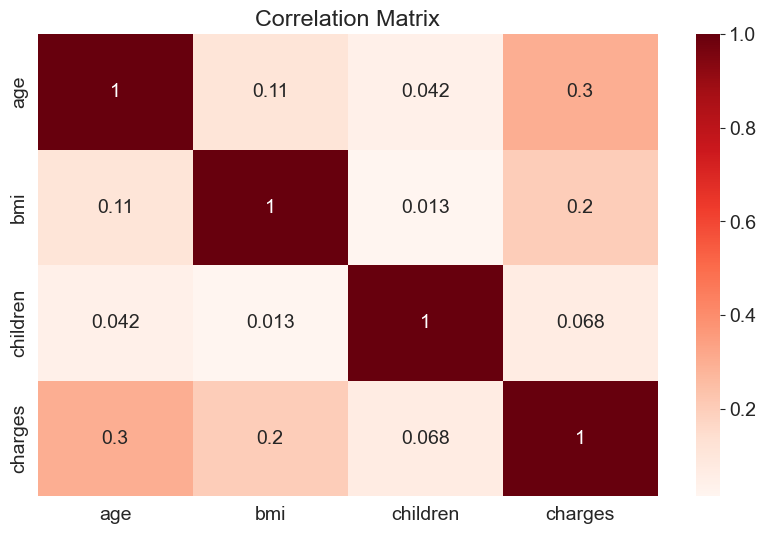

In [24]:
# Select only numeric columns before computing the correlation matrix
numeric_data = medical_data.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix')
plt.show()


In [25]:
non_smoker_data = medical_data[medical_data.smoker == 'no']

<Axes: title={'center': 'Age vs. Charges'}, xlabel='age', ylabel='charges'>

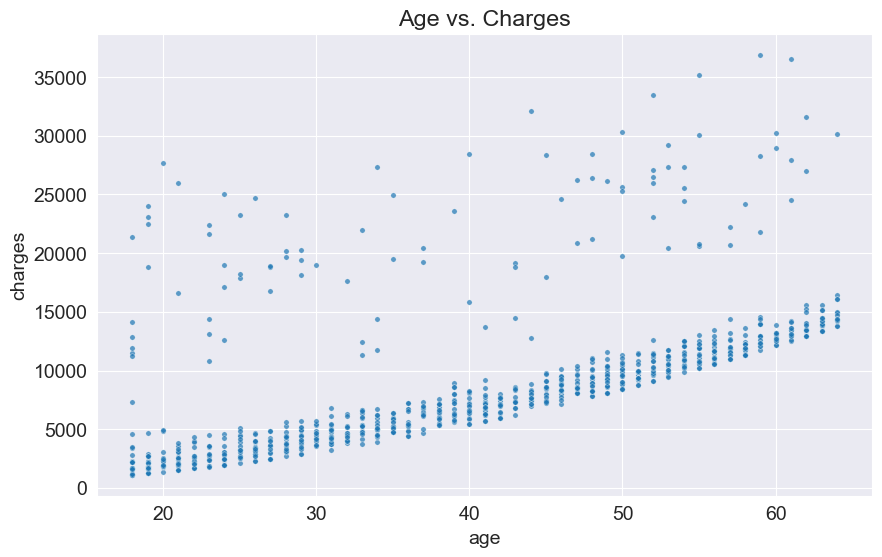

In [26]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_data, x='age', y='charges', alpha=0.7, s=15)

In [27]:
def estimate_charges(age, w, b):
    return w * age + b

In [28]:
w = 50
b = 100

In [36]:
ages = non_smoker_data['age']
estimated_charges = estimate_charges(ages, w, b)
print(estimated_charges)

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64


Text(0, 0.5, 'Estimated Charges')

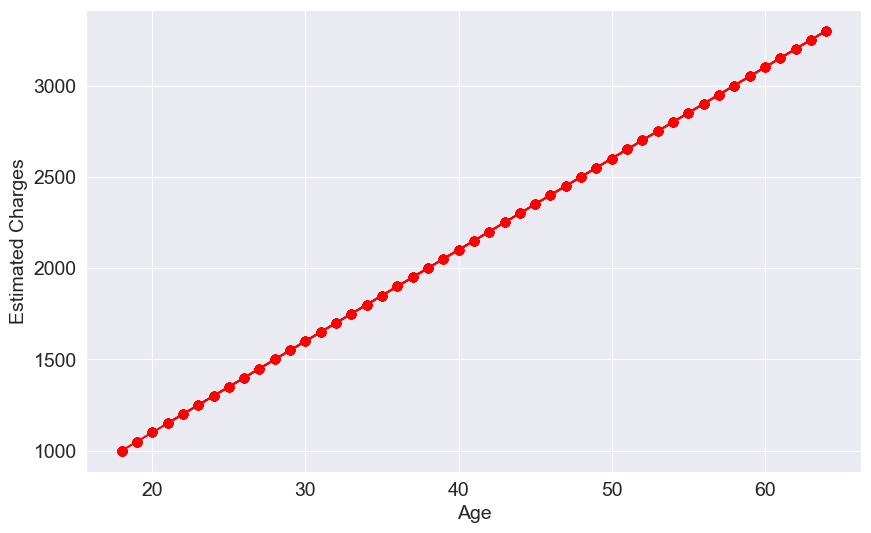

In [37]:
plt.plot(ages, estimated_charges, 'r-o')
plt.xlabel('Age')
plt.ylabel('Estimated Charges')

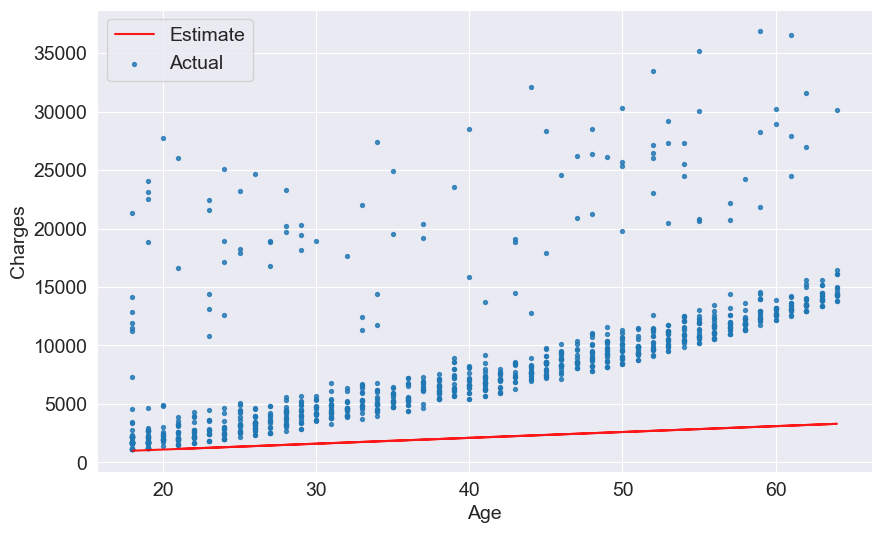

In [38]:
target = non_smoker_data['charges']

plt.plot(ages, estimated_charges, 'r', alpha=0.9)
plt.scatter(ages, target, s=8,alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual'])

In [39]:
def try_parameters(w, b):
    ages = non_smoker_data.age
    target = non_smoker_data.charges
    estimated_charges = estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9)
    plt.scatter(ages, target, s=8,alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])

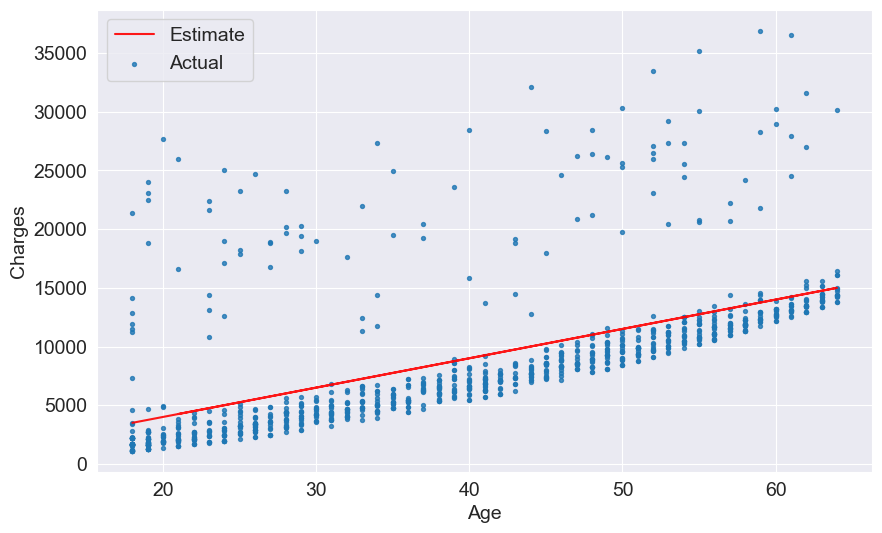

In [44]:
try_parameters(250, -1000)

In [53]:
import numpy as np

In [54]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
model = LinearRegression()

In [47]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [48]:
inputs = non_smoker_data[['age']]
targets = non_smoker_data.charges
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)

inputs.shape : (1064, 1)
targes.shape : (1064,)


In [49]:
model.fit(inputs, targets)

LinearRegression()

In [50]:
model.predict(np.array([[23], 
                        [37], 
                        [61]]))

c:\Users\KISHOR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [57]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [56]:
rmse(targets,predictions)

4662.505766636395

In [58]:
# w
model.coef_

array([267.24891283])

In [59]:
# b
model.intercept_

-2091.4205565650864

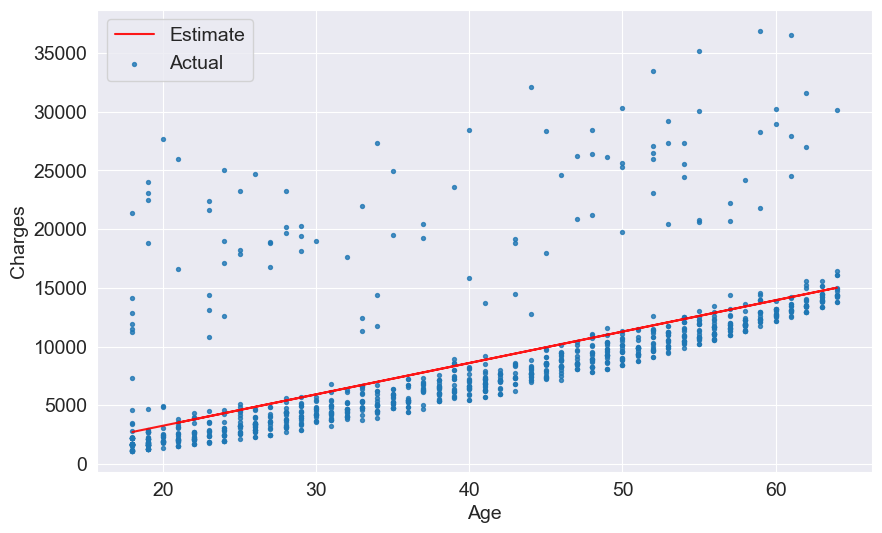

In [60]:
try_parameters(model.coef_, model.intercept_)

In [68]:
# Create inputs and targets
inputs, targets = non_smoker_data[['age']], non_smoker_data['charges']
print(target)

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict([[29]])
print(predictions)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64
[5658.79791554]
Loss: 6602.6427925702865


c:\Users\KISHOR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [70]:
#pridicting estimated medical charges on the bmi and age for non somker data
# Create inputs and targets
inputs, targets = non_smoker_data[['age', 'bmi']], non_smoker_data['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict([[25,9]])

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 7199.317213898754


c:\Users\KISHOR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [71]:
non_smoker_data.charges.corr(non_smoker_data.bmi)

0.08403654312833271

In [72]:
rmse(targets,predictions)

7199.317213898754

In [73]:
fig = px.scatter(non_smoker_data, x='bmi', y='charges', title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [74]:
fig = px.scatter_3d(non_smoker_data, x='age', y='bmi', z='charges')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()

In [75]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), -2293.6320906488727)

In [76]:
non_smoker_data.charges.corr(non_smoker_data.children)

0.13892870453542205

In [77]:
fig = px.strip(non_smoker_data, x='children', y='charges', title= "Children vs. Charges")
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()

In [80]:
# Create inputs and targets
inputs, targets = non_smoker_data[['age', 'bmi', 'children']], non_smoker_data['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict([[28,18,2]])
print(predictions)
# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

[5875.28147454]
Loss: 6514.604329126963


c:\Users\KISHOR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [81]:
medical_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Axes: xlabel='smoker', ylabel='charges'>

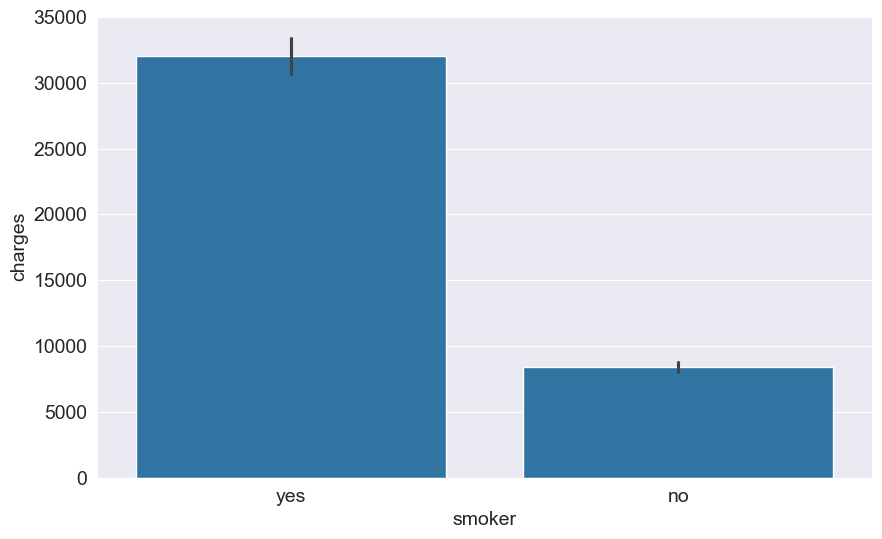

In [83]:
sns.barplot(data=medical_data, x='smoker', y='charges')

In [84]:
smoker_codes = {'no': 0, 'yes': 1}
medical_data['smoker_code'] = medical_data.smoker.map(smoker_codes)

In [85]:
medical_data.charges.corr(medical_data.smoker_code)

0.7872514304984778

In [86]:
medical_data.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


In [88]:
# Create inputs and targets
inputs, targets = medical_data[['age', 'bmi', 'children', 'smoker_code']], medical_data['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict([[60,24,2,1]])

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 25620.831915702678


c:\Users\KISHOR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



<Axes: xlabel='sex', ylabel='charges'>

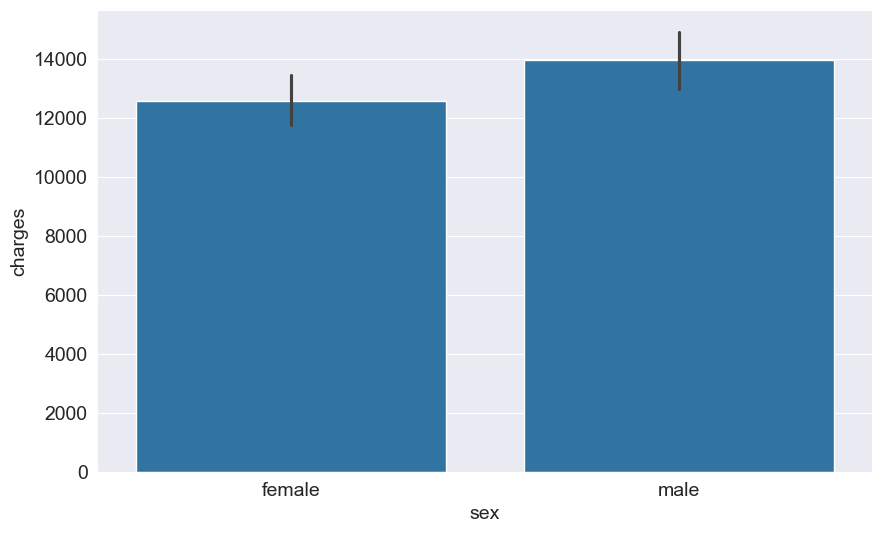

In [89]:
sns.barplot(data=medical_data, x='sex', y='charges')

In [90]:
sex_codes = {'female': 0, 'male': 1}
medical_data['sex_code'] = medical_data.sex.map(sex_codes)

In [91]:
medical_data.charges.corr(medical_data.sex_code)

0.05729206220202533

In [93]:
# Create inputs and targets
inputs, targets = medical_data[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medical_data['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict([[59,18,2,0,1]])
print(predictions)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

[9776.64053523]
Loss: 12599.57448764995


c:\Users\KISHOR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



<Axes: xlabel='region', ylabel='charges'>

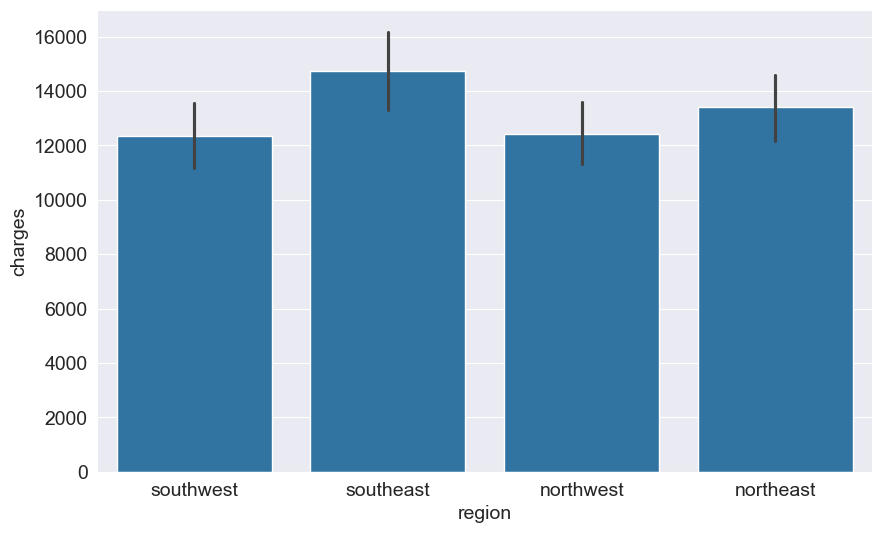

In [94]:
sns.barplot(data=medical_data, x='region', y='charges')

In [95]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_data[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [96]:
one_hot = enc.transform(medical_data[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [98]:
medical_data[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot
medical_data

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [99]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_data[input_cols], medical_data['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


In [100]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [101]:
model.intercept_

-12525.54781119545

In [102]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


In [103]:
from sklearn.preprocessing import StandardScaler

In [104]:
numeric_cols = ['age', 'bmi', 'children'] 
scaler = StandardScaler()
scaler.fit(medical_data[numeric_cols])

StandardScaler()

In [106]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [107]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [108]:
scaled_inputs = scaler.transform(medical_data[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [109]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_data[cat_cols].values

In [110]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = medical_data.charges

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.679651174452


In [111]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


As you can see now, the most important feature are:

1. Smoker
2. Age
3. BMI